In [1]:
import matplotlib.pyplot as plt;
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.datasets import load_iris

In [2]:
                                                                        # k-means
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [7]:
iris = load_iris()
dir(iris)
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"]= iris.target
df.columns
df = df.drop( columns = ["sepal length (cm)", "sepal width (cm)"])
df.columns

Index(['petal length (cm)', 'petal width (cm)', 'target'], dtype='object')

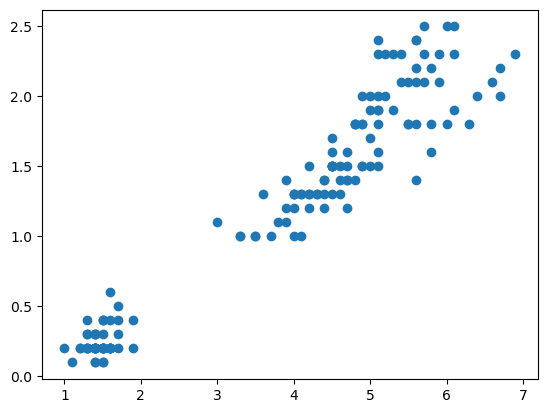

In [9]:
plt.scatter(df["petal length (cm)"], df["petal width (cm)"])

In [10]:
km = KMeans(n_clusters=2)
y_predicts = km.fit_predict(df[["petal length (cm)", "petal width (cm)"]])

C:\Users\sanjay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
df["predict"] = y_predicts

In [12]:
df0 = df[df.predict == 0]
df1 = df[df.predict == 1]

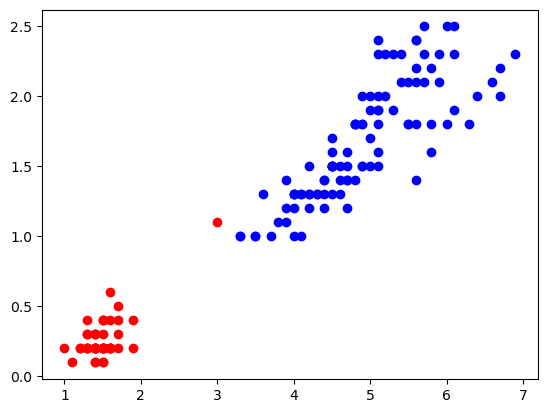

In [13]:
plt.scatter(df0["petal length (cm)"], df0["petal width (cm)"], color = "blue")
plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"],color="red")

In [14]:
scaler = MinMaxScaler()
scaler.fit(df[["petal length (cm)"]])
df["petal length (cm)"] = scaler.transform(df[["petal length (cm)"]])
scaler.fit(df[["petal width (cm)"]])
df["petal width (cm)"] = scaler.transform(df[["petal width (cm)"]])

In [16]:
df

,petal length (cm),petal width (cm),target,predict
0,0.067797,0.041667,0,1
1,0.067797,0.041667,0,1
2,0.050847,0.041667,0,1
3,0.084746,0.041667,0,1
4,0.067797,0.041667,0,1
...,...,...,...,...
145,0.711864,0.916667,2,0
146,0.677966,0.750000,2,0
147,0.711864,0.791667,2,0
148,0.745763,0.916667,2,0


C:\Users\sanjay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


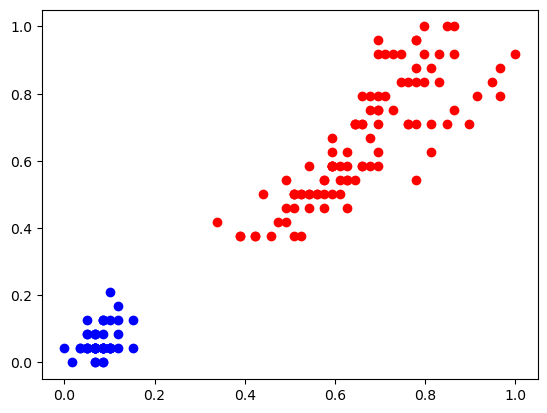

In [17]:
km = KMeans(n_clusters=2)
y_predicts = km.fit_predict(df[["petal length (cm)", "petal width (cm)"]])

df["predict"] = y_predicts

df0 = df[df.predict == 0]
df1 = df[df.predict == 1]

plt.scatter(df0["petal length (cm)"], df0["petal width (cm)"], color = "blue")
plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"],color="red")

In [18]:
                                                                        # naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()


In [23]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
from sklearn.preprocessing import LabelEncoder

X = df[['Sex', "Fare", "Pclass"]]
y = df['Survived']

le = LabelEncoder()
X["Sex"] = le.fit_transform(X["Sex"])
X

C:\Users\sanjay\AppData\Local\Temp\ipykernel_14028\618073628.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex"] = le.fit_transform(X["Sex"])


,Sex,Fare,Pclass
0,1,7.2500,3
1,0,71.2833,1
2,0,7.9250,3
3,0,53.1000,1
4,1,8.0500,3
...,...,...,...
886,1,13.0000,2
887,0,30.0000,1
888,0,23.4500,3
889,1,30.0000,1


In [27]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.predict(X_test)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0], dtype=int64)

In [30]:
gnb.score(X_test, y_test)

0.7653631284916201

In [33]:
from sklearn.datasets import load_wine

df = load_wine()
dir(df)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [35]:
X = df.data
y = df.target

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [43]:
mnb.predict(X_test)

array([1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0,
       0, 2, 1, 1, 0, 0, 2, 2, 1, 1, 0, 0, 0, 1])

In [45]:
mnb.score(X_test, y_test)

0.8888888888888888

In [46]:
                                                                # hyperparameter  tunning

In [48]:
from sklearn.model_selection import cross_val_score
                                                # writing kfold method




In [3]:
                                                                # L1 and L2 Regularization

In [5]:
dataset = pd.read_csv("Melbourne_housing_FULL.csv")
dataset.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [7]:
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount', 
               'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
dataset = dataset[cols_to_use]
dataset.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [9]:
dataset.isna().sum()
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)

dataset["BuildingArea"] = dataset["BuildingArea"].fillna(dataset.BuildingArea.mean())
dataset["Landsize"] = dataset["Landsize"].fillna(dataset.Landsize.mean())


dataset.dropna(inplace = True)
dataset.isna().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

In [11]:
y = dataset["Price"]
X = dataset.drop("Price", axis=1)

In [13]:
X = pd.get_dummies(X, drop_first = True)
X.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Suburb_Aberfeldie,Suburb_Airport West,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,False,False,...,False,False,False,False,False,False,False,False,True,False
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,False,False,...,False,False,False,False,False,False,False,False,True,False
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,False,False,...,False,False,False,False,False,False,False,False,True,False
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,False,False,...,False,False,False,False,False,False,False,False,True,False


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)                #linearreg
lr.score(X_test, y_test)

0.1385368316159704

In [22]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)    #lasso_reg
lasso_reg.fit(X_train, y_train)
lasso_reg.score(X_test, y_test)


C:\Users\sanjay\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.327e+15, tolerance: 7.963e+14
  model = cd_fast.enet_coordinate_descent(


0.6636111369404489

In [ ]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)    #lasso_reg
lasso_reg.fit(X_train, y_train)
lasso_reg.score(X_test, y_test)

In [26]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)                 #ridge_reg
ridge_reg.fit(X_train, y_train)
ridge_reg.score(X_test, y_test)

0.6670848945194958

In [ ]:
                                                                            #KNN classifications

In [5]:
from sklearn.datasets import load_digits
digit = load_digits()
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [7]:
X = digit.data
y = digit.target
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [60]:
knn.score(X_test, y_test)

0.9851851851851852

In [66]:
y_pred = knn.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[58,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 66,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 45,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 57,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 48,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 56,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0,  0, 55,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0,  0, 55]], dtype=int64)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       0.93      1.00      0.96        66
           2       1.00      0.98      0.99        46
           3       1.00      1.00      1.00        57
           4       1.00      1.00      1.00        49
           5       0.98      0.98      0.98        49
           6       1.00      1.00      1.00        43
           7       0.98      1.00      0.99        56
           8       1.00      0.93      0.96        59
           9       0.98      0.96      0.97        57

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [70]:
                                                                # principal component analysis

In [5]:
df = pd.read_csv("heart.csv")
X = df.drop("HeartDisease", axis =1 )
y = df.HeartDisease

X = pd.get_dummies(X, dummy_na=True)

In [7]:
from sklearn.preprocessing import StandardScaler
Scaled = StandardScaler()
xscld = Scaled.fit_transform(X)
xscld

array([[-1.4331398 ,  0.41090889,  0.82507026, ..., -1.00218103,
         1.15067399,  0.        ],
       [-0.47848359,  1.49175234, -0.17196105, ...,  0.99782372,
        -0.86905588,  0.        ],
       [-1.75135854, -0.12951283,  0.7701878 , ..., -1.00218103,
         1.15067399,  0.        ],
       ...,
       [ 0.37009972, -0.12951283, -0.62016778, ...,  0.99782372,
        -0.86905588,  0.        ],
       [ 0.37009972, -0.12951283,  0.34027522, ...,  0.99782372,
        -0.86905588,  0.        ],
       [-1.64528563,  0.30282455, -0.21769643, ..., -1.00218103,
         1.15067399,  0.        ]])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(xscld, y, test_size= 0.3 , random_state = 30)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=13)
Xpca = pca.fit_transform(X)

In [13]:
pca.explained_variance_ratio_

array([9.20185615e-01, 4.91339098e-02, 2.50809281e-02, 5.33143209e-03,
       9.58730160e-05, 3.27256348e-05, 2.58242993e-05, 2.37026857e-05,
       2.14964820e-05, 1.86250554e-05, 1.47604812e-05, 1.30053999e-05,
       1.15593681e-05])

In [15]:
pca.n_components_

13

In [17]:
X_train_pcs, X_test_pca, y_train_pca, y_test_pca = train_test_split(Xpca, y, test_size=0.3, random_state=30)

In [19]:
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score

In [25]:
svc = SVC()
lr = LogisticRegression(max_iter = 1000)
rfc = RandomForestClassifier(n_estimators=100)

In [27]:
print(cross_val_score(svc, X_train_pcs,y_train_pca ))
print(cross_val_score(lr, X_train_pcs,y_train_pca ))
print(cross_val_score(rfc, X_train_pcs,y_train_pca ))

[0.68992248 0.73643411 0.7265625  0.6171875  0.7109375 ]
[0.86821705 0.89147287 0.8046875  0.8515625  0.8984375 ]
[0.86821705 0.86046512 0.8046875  0.8515625  0.875     ]


In [29]:
print(cross_val_score(svc, xscld,y ))
print(cross_val_score(lr, xscld,y ))
print(cross_val_score(rfc, xscld,y ))

[0.88043478 0.82608696 0.83695652 0.82513661 0.74863388]
[0.85326087 0.83695652 0.82608696 0.8579235  0.75956284]
[0.90217391 0.80978261 0.83695652 0.83606557 0.76502732]


In [52]:
k = cross_val_score(rfc,  X_train_pcs,y_train_pca)
avg = np.average(k)
avg

0.8519743217054263